In [1]:
#Importing Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')

In [4]:
##Extracting CSV Dataset From System using Pandas Library
data = pd.read_csv(" heart_disease_dataset.csv")

In [3]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


In [5]:
#All Columns in the Dataset

data.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

<h1>There are thirteen features in Dataset</h1>

In [7]:
#checking null values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

<h1>Percentage of people having Heart Disease</h1>

In [8]:
num=data.groupby('num').size()

In [9]:
num

num
0    164
1    139
dtype: int64

In [10]:
#Converting Numerical Data into Categorical Data

def heart_disease(row):
    if row==0:
        return 'Absence'
    elif row==1:
        return 'Presence'

In [12]:
#Applying converted data into our dataset with new column - Heart_Disease

data['Heart_Disease']=data['num'].apply(heart_disease)


In [15]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_Disease
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,Absence
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,Presence
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Presence
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,Absence
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1,Presence
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1,Presence
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1,Presence
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1,Presence


In [17]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_Disease
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,Absence
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,Presence
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Presence
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,Absence
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,Absence
5,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0,Absence
6,62,0,4,140,268,0,2,160,0,3.6,3,2,3,1,Presence
7,57,0,4,120,354,0,0,163,1,0.6,1,0,3,0,Absence
8,63,1,4,130,254,0,2,147,0,1.4,2,1,7,1,Presence
9,53,1,4,140,203,1,2,155,1,3.1,3,0,7,1,Presence


In [18]:
hd=data.groupby('Heart_Disease')['num'].count()
hd

Heart_Disease
Absence     164
Presence    139
Name: num, dtype: int64

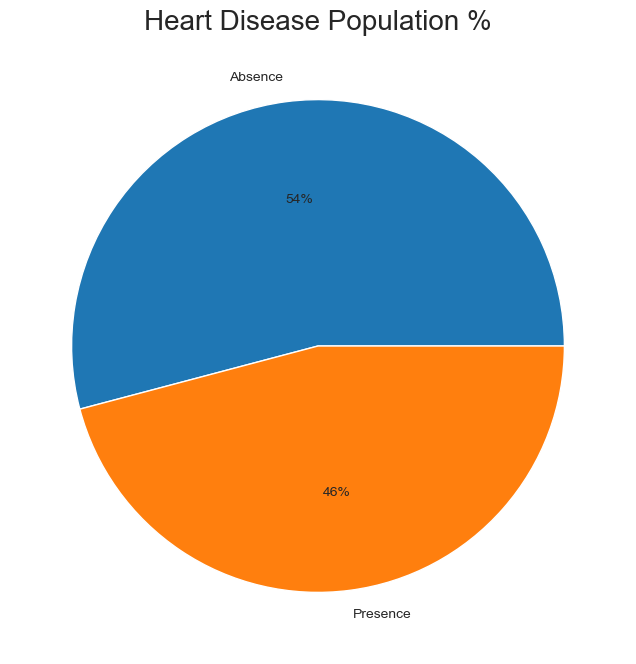

In [29]:
#Pie Chart Creation of Heart Disease Population % using MatplotLib

plt.figure(figsize=(10,8))
plt.pie(hd, labels=['Absence','Presence'], autopct='%0.0f%%')
plt.title('Heart Disease Population %', fontsize=20)
plt.show()



<h3>From the overall population, people having heart disease (46%) are lesser than those who have don't heart disease(56%)</h3>

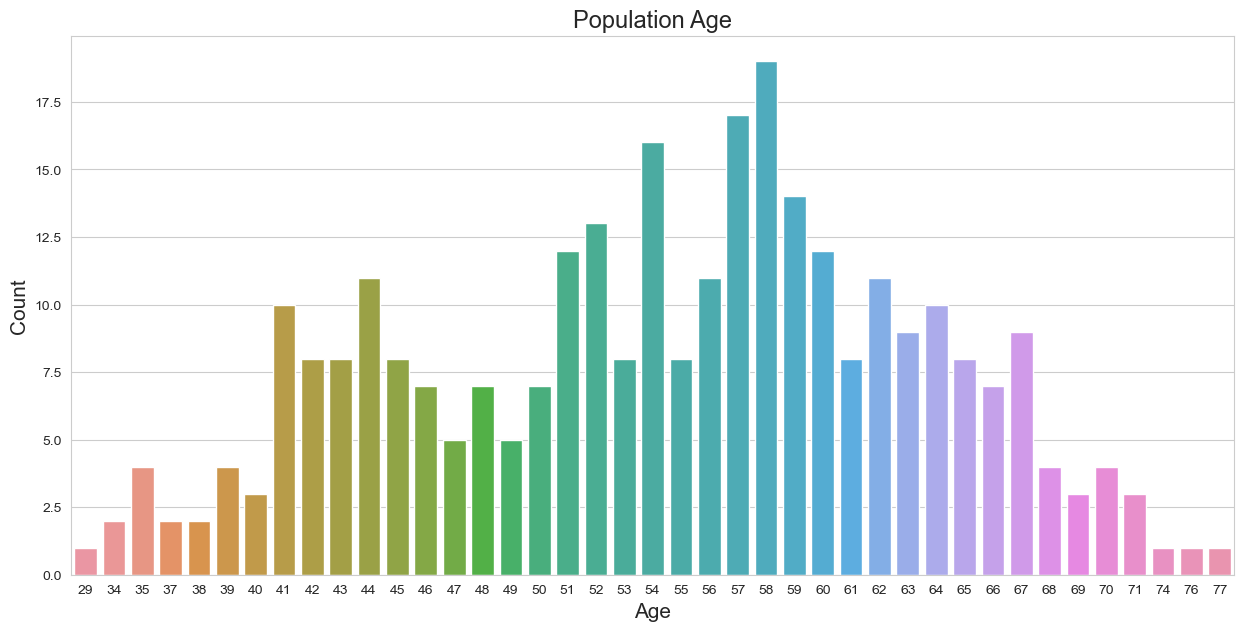

In [30]:

#Countplot Creation of Population Age using MatplotLib and Seaborn

plt.figure(figsize=(15,7))
sns.countplot(x='age', data=data)
plt.title('Population Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

<h3>In this section, the best analysis can be divided into the elderly,middle-aged, young people by looking at the age ranges.</h3>

In [31]:
#Statistical Analysis

Min_Age=data['age'].min()
Max_Age=data['age'].max()
Mean_Age=data['age'].mean()
print("Minimum Age =",Min_Age)
print("Maximum Age =",Max_Age)
print("Mean Age =",Mean_Age)

Minimum Age = 29
Maximum Age = 77
Mean Age = 54.43894389438944


In [32]:
#Categorical Analysis

Young_Ages=data[(data['age']>=29) & (data['age']<40)]
Middle_Ages=data[(data['age']>=40) & (data['age']<55)]
Elderly_Ages=data[(data['age']>55)]
print('Young Ages =',len(Young_Ages))
print('Middle Ages =',len(Middle_Ages))
print('Elderly Ages =',len(Elderly_Ages))

Young Ages = 15
Middle Ages = 128
Elderly Ages = 152


C:\Users\prach\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


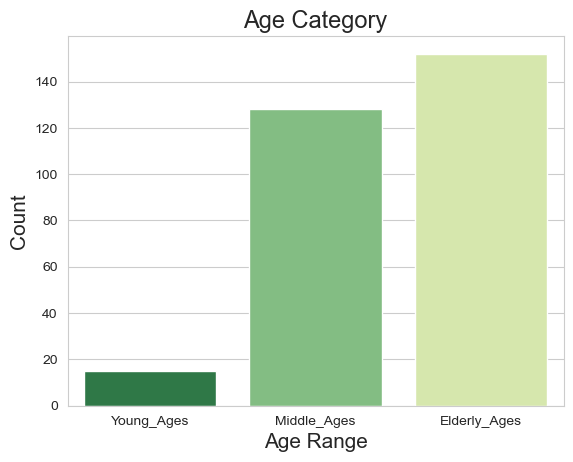

In [33]:
#Bar Plot Creation of Age Category using MatplotLib and Seaborn

sns.barplot(x=['Young_Ages','Middle_Ages','Elderly_Ages'], y=[len(Young_Ages), len(Middle_Ages), len(Elderly_Ages)], palette='YlGn_r')
plt.title('Age Category', fontsize=17)
plt.xlabel('Age Range', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

In [35]:
#Converting Numerical Data into Categorical Data

def gender(row):
    if row==1:
        return 'Male'
    elif row==0:
        return 'Female'

In [36]:
#Applying converted data into our dataset with new column - sex1

data['sex1']=data['sex'].apply(gender)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_Disease,sex1
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,Absence,Male
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,Presence,Male
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Presence,Male
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,Absence,Male
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,Absence,Female


In [37]:
#Converting Numerical Data into Categorical Data

def age_range(row):
    if row>=29 and row<40:
        return 'Young Age'
    elif row>=40 and row<55:
        return 'Middle Age'
    elif row>55:
        return 'Elder Age'

In [38]:
#Applying converted data into our dataset with new column - Age_Range

data['Age_Range']=data['age'].apply(age_range)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_Disease,sex1,Age_Range
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,Absence,Male,Elder Age
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,Presence,Male,Elder Age
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Presence,Male,Elder Age
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,Absence,Male,Young Age
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,Absence,Female,Middle Age


C:\Users\prach\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\prach\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\prach\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


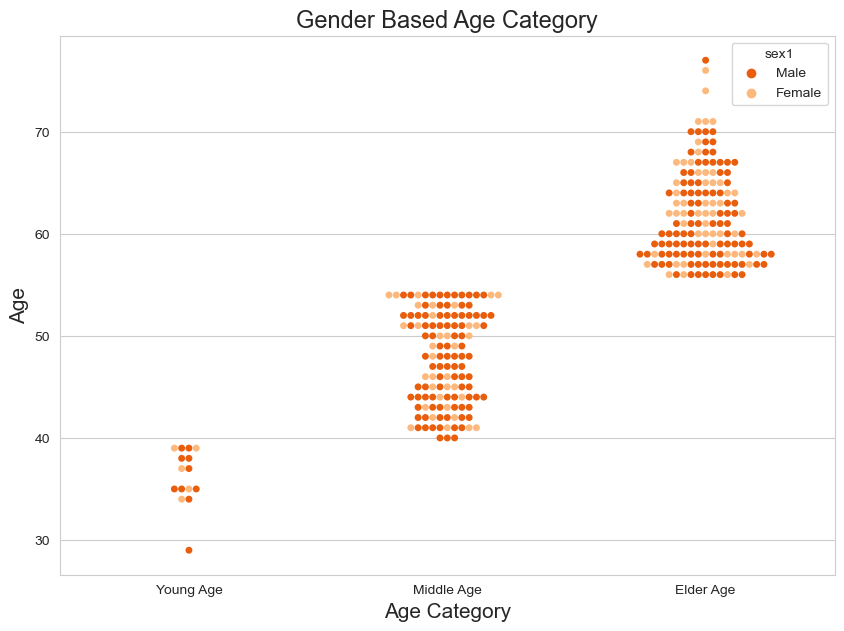

In [39]:
#Swarm Plot Creation of Gender Based Age Category using MatplotLib and Seaborn

plt.figure(figsize=(10,7))
sns.swarmplot(x='Age_Range', y='age', hue='sex1', data=data, order=['Young Age','Middle Age','Elder Age'], palette='Oranges_r')
plt.title('Gender Based Age Category', fontsize=17)
plt.xlabel('Age Category', fontsize=15)
plt.ylabel('Age', fontsize=15)
plt.show()

<h3>In Our Population Number Of Males are more in Middle Age Category and Females are more in Elder Age Category</h3>

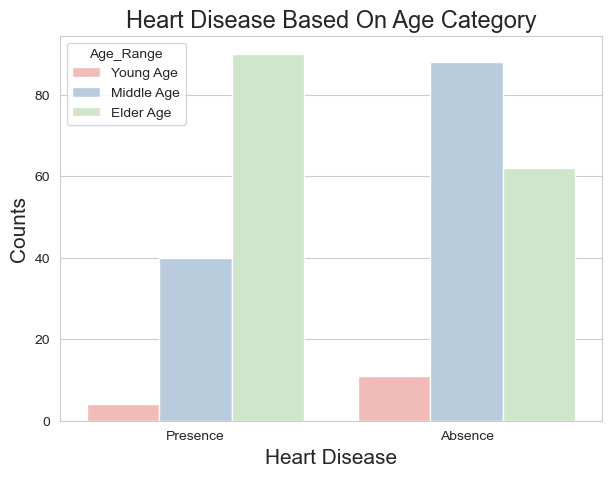

In [41]:
#Count Plot Creation of Heart Disease Based On Age Category using MatplotLib and Seaborn

plt.figure(figsize=(7,5))
hue_order=['Young Age', 'Middle Age', 'Elder Age']
sns.countplot(x='Heart_Disease', hue='Age_Range', data=data, order=['Presence','Absence'], hue_order=hue_order, palette='Pastel1')
plt.title('Heart Disease Based On Age Category', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

<h3>Elder Age People are most affected by Heart Disease AND Middle Age People are mostly FREE from any kind of Heart Disease</h3>

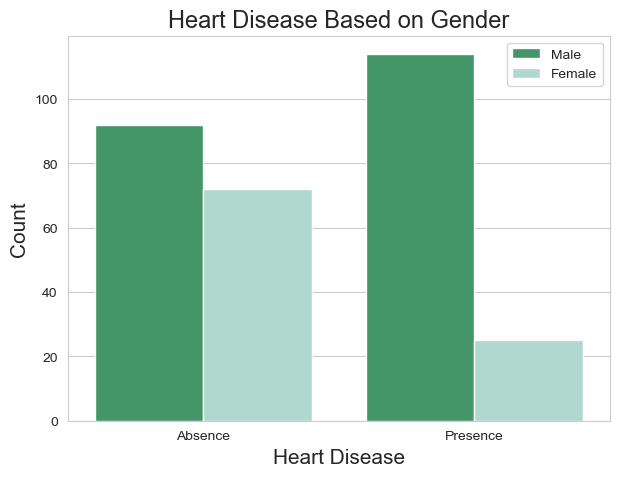

In [43]:
#Count Plot Creation of Heart Disease Based on Gender using MatplotLib and Seaborn

plt.figure(figsize=(7,5))
sns.countplot(x=data['Heart_Disease'], hue='sex1', data=data, palette='BuGn_r')
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(labels=['Male','Female'])
plt.title('Heart Disease Based on Gender',fontsize=17)
plt.show()

<h3>We can see that Males are more prone to Heart Disease</h3>

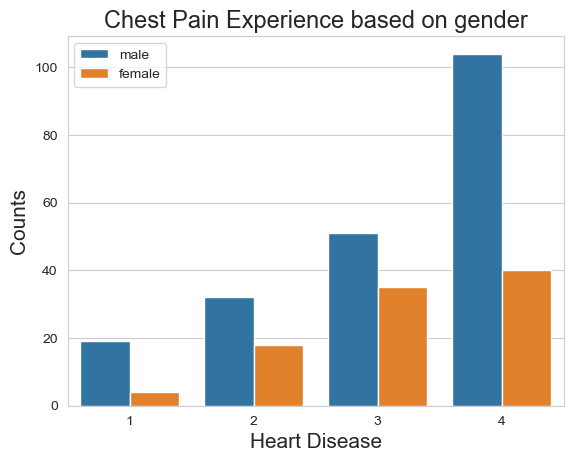

In [73]:
#Chest pain experience gender wise
sns.countplot(x=data['cp'], hue='sex1', data=data)
plt.title('Chest Pain Experience based on gender', fontsize=17)
plt.xlabel('Heart Disease',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.legend(labels=['male','female'])
plt.show()

<h3>We can see the The chest pain experience in all 4 values males are more affected then females</h3>

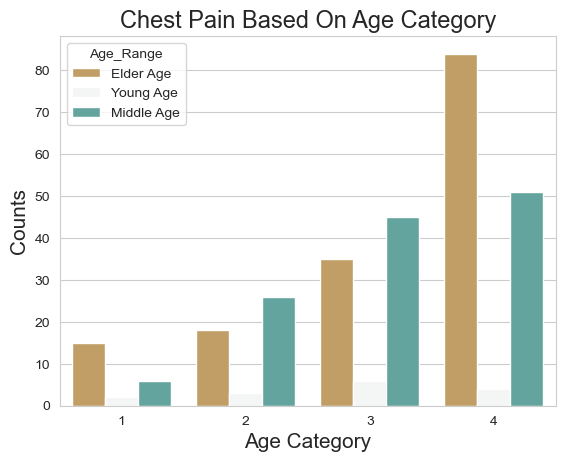

In [79]:
#Count Plot Creation of Chest Pain Based On Age Category using MatplotLib and Seaborn

sns.countplot(x=data['cp'], hue='Age_Range', data=data, palette='BrBG')
plt.title('Chest Pain Based On Age Category', fontsize=17)
plt.xlabel('Age Category', fontsize=15)
plt.ylabel('Counts', fontsize=15)
#plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

<h3>We can see the The chest pain experience in all 4 values based on Age_Range in Typical Angina Elders are more affected,in Atypical Angina Middle age are more affected,in Non-Anginal pain also middle are more affected and in Asymptomatic Elders are more affected, and in all four values young aged people are less affected. </h3>

In [75]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_Disease,sex1,Age_Range
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,Absence,Male,Elder Age
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,Presence,Male,Elder Age
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Presence,Male,Elder Age
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,Absence,Male,Young Age
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,Absence,Female,Middle Age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1,Presence,Male,Middle Age
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1,Presence,Male,Elder Age
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1,Presence,Male,Elder Age
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1,Presence,Female,Elder Age


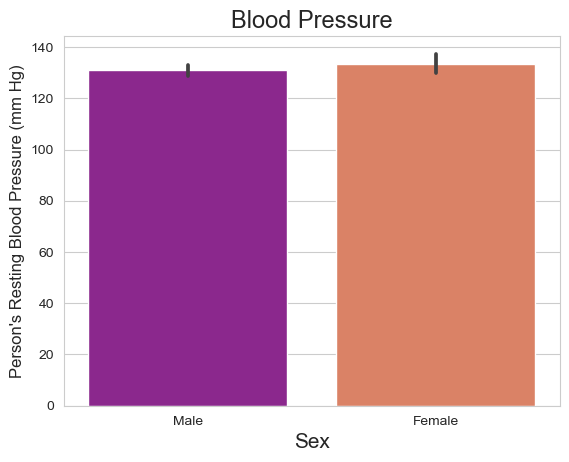

In [81]:
#Bar Plot Creation of Person's Resting Blood Pressure (mm Hg) using MatplotLib and Seaborn

sns.barplot(x='sex1', y='trestbps', data=data, palette='plasma')
plt.title("Blood Pressure", fontsize=17)
plt.xlabel('Sex',fontsize=15)
plt.ylabel("Person's Resting Blood Pressure (mm Hg)", fontsize=12)
plt.show()

<h3>Blood Pressure Rate is almost equal in Males and Females</h3>

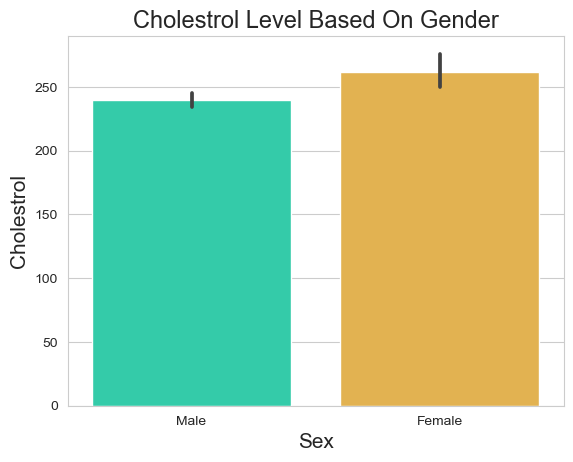

In [82]:
#Bar Plot Creation of Cholestrol Level Based On Gender using MatplotLib and Seaborn

sns.barplot(x='sex1', y='chol', data=data, palette='turbo')
plt.title("Cholestrol Level Based On Gender", fontsize=17)
plt.xlabel('Sex',fontsize=15)
plt.ylabel("Cholestrol", fontsize=15)
plt.show()

<h3>females have little bit of higher cholesterol than males</h3>

C:\Users\prach\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


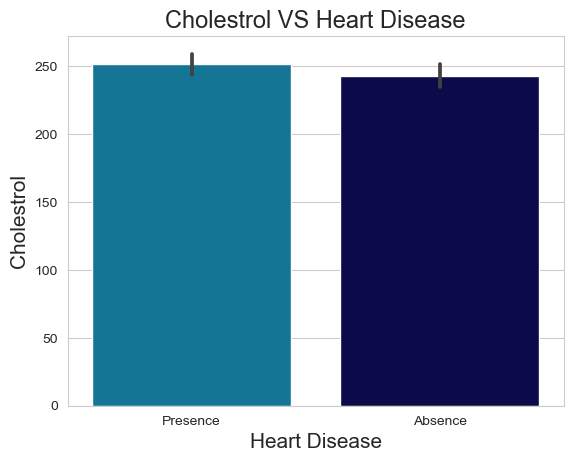

In [84]:
#Bar Plot Creation of Cholestrol VS Heart Disease using MatplotLib and Seaborn

sns.barplot(x='Heart_Disease', y='chol', data=data, palette='ocean_r')
plt.title('Cholestrol VS Heart Disease', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Cholestrol', fontsize=15)
plt.show()

<h3> Higher Cholestrol Level results Chances Of Heart Disease</h3>

C:\Users\prach\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


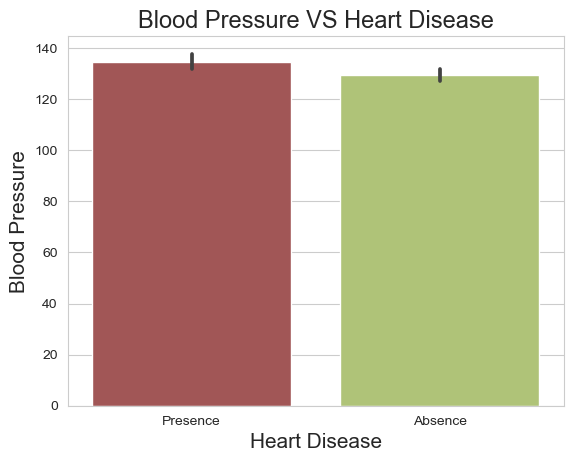

In [85]:
#Bar Plot Creation of Blood Pressure VS Heart Disease using MatplotLib and Seaborn

sns.barplot(x='Heart_Disease', y='trestbps', data=data, palette='tab20b_r')
plt.title('Blood Pressure VS Heart Disease', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Blood Pressure', fontsize=15)
plt.show()

<h3>Higher Blood Pressure Level results Chances Of Heart Disease</h3>

C:\Users\prach\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\prach\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


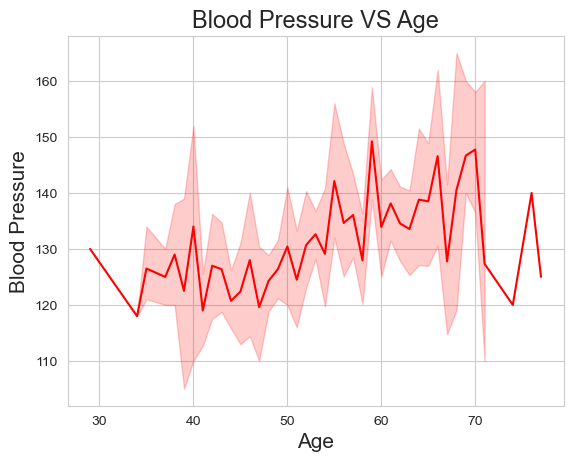

In [86]:
#Line Plot Creation of Blood Pressure VS Age using MatplotLib and Seaborn

sns.lineplot(x='age', y='trestbps', data=data, color='r')
plt.title('Blood Pressure VS Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Blood Pressure', fontsize=15)
plt.show()

<h3> Here we can observe that Blood Pressure increases between age of 50 to 60 and somehow continue the pattern till 70</h3>

C:\Users\prach\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\prach\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


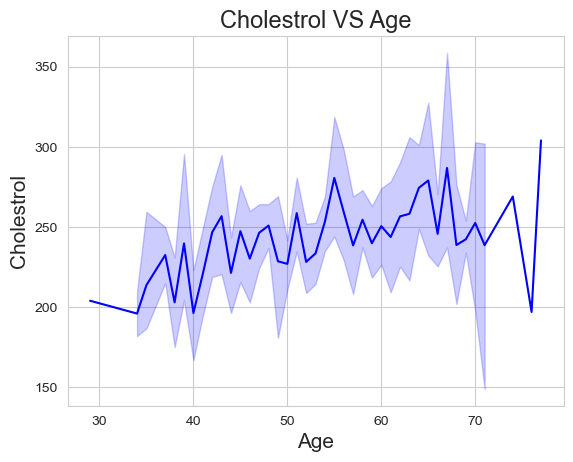

In [87]:
#Line Plot Creation of Cholestrol VS Age using MatplotLib and Seaborn

sns.lineplot(x='age', y='chol', data=data, color='b')
plt.title('Cholestrol VS Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Cholestrol', fontsize=15)
plt.show()

<h3>Similarly Cholestrol Increasing in the age group of 50-60</h3>

C:\Users\prach\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\prach\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


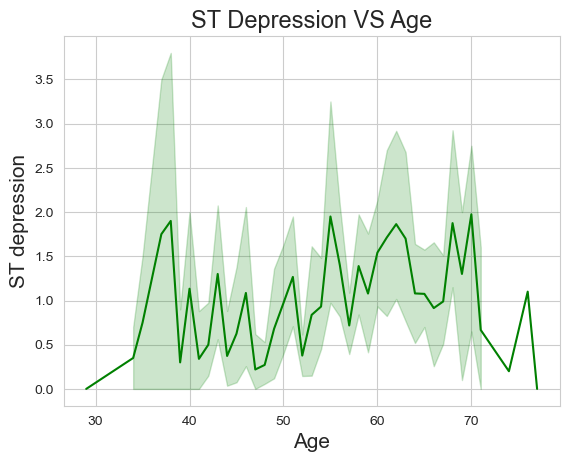

In [88]:
#Line Plot Creation of ST Depression VS Age using MatplotLib and Seaborn

sns.lineplot(x='age', y='oldpeak', data=data, color='g')
plt.title('ST Depression VS Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('ST depression', fontsize=15)
plt.show()

<h3> we can observe from here that ST depression mostly increases bw the age group of 30-40.ST depression refers to a finding on an electrocardiogram, wherein the trace in the ST segment is abnormally low below the baseline.</h3>

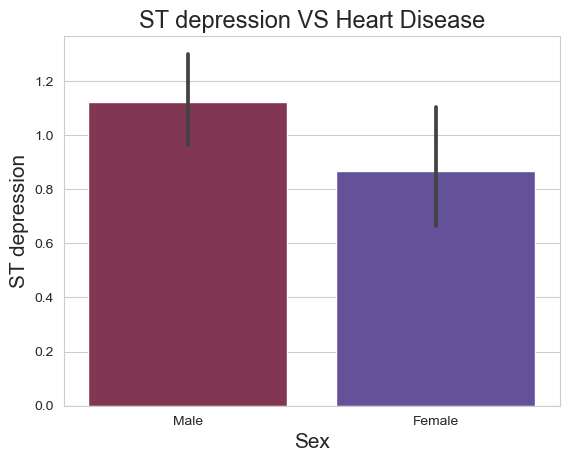

In [89]:
#Bar Plot Creation of ST depression VS Heart Disease using MatplotLib and Seaborn

sns.barplot(x='sex1', y='oldpeak', data=data, palette='twilight_r')
plt.title('ST depression VS Heart Disease', fontsize=17)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('ST depression', fontsize=15)
plt.show()

<h3>More Males are prone to ST depression as compare to females</h3>

C:\Users\prach\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


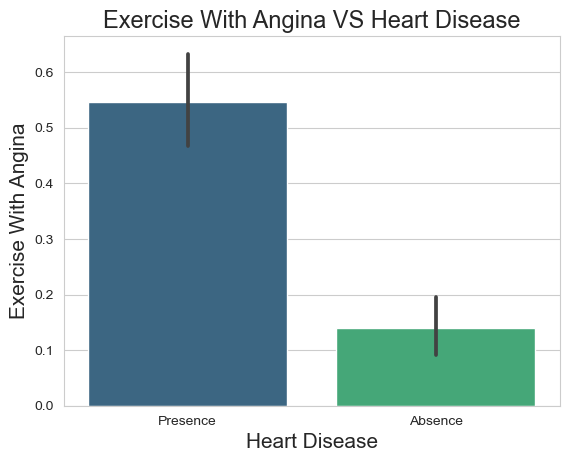

In [90]:
#Bar Plot Creation of Exercise With Angina VS Heart Disease using MatplotLib and Seaborn

sns.barplot(x='Heart_Disease', y='exang', data=data, palette='viridis')
plt.title('Exercise With Angina VS Heart Disease', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Exercise With Angina', fontsize=15)
plt.show()

<h3>If you suffer from Angina, you may be concerned that exercise will make your symptoms worse.</h3>

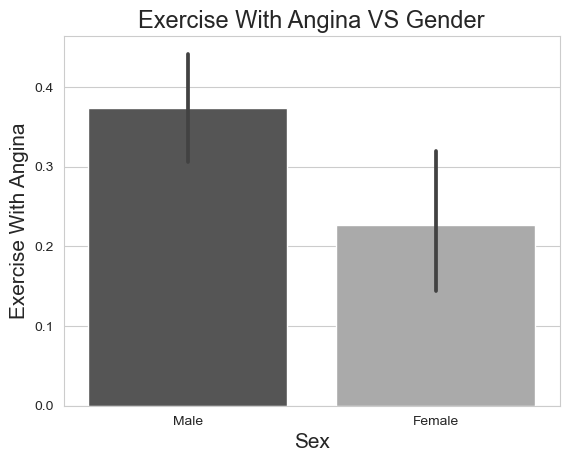

In [91]:
#Bar Plot Creation of Exercise With Angina VS Gender using MatplotLib and Seaborn

sns.barplot(x='sex1', y='exang', data=data, palette='binary_r')
plt.title('Exercise With Angina VS Gender', fontsize=17)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Exercise With Angina', fontsize=15)
plt.show()

<h3>Males have have high Exercise Angina, A type of chest pain caused by reduced blood flow to the heart.</h3>

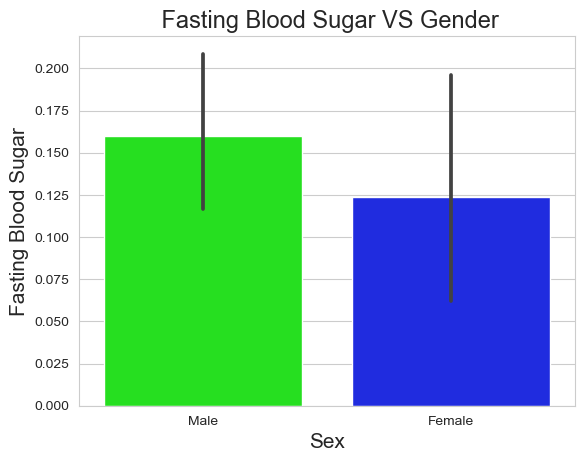

In [92]:
#Bar Plot Creation of Fasting Blood Sugar VS Gender using MatplotLib and Seaborn

sns.barplot(y='fbs', x='sex1', data=data, palette='hsv')
plt.title(' Fasting Blood Sugar VS Gender', fontsize=17)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Fasting Blood Sugar', fontsize=15)
plt.show()

<h3>Males have high no of Fasting Blood Sugar over 120</h3>

In [108]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,sex1,Age_Range,Heart_Disease_Encoded,Sex_Encoded,Age_Range_Encoded
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,Male,Elder Age,0,1,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,Male,Elder Age,1,1,0
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Male,Elder Age,1,1,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,Male,Young Age,0,1,2
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,Female,Middle Age,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1,Male,Middle Age,1,1,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1,Male,Elder Age,1,1,0
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1,Male,Elder Age,1,1,0
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1,Female,Elder Age,1,0,0


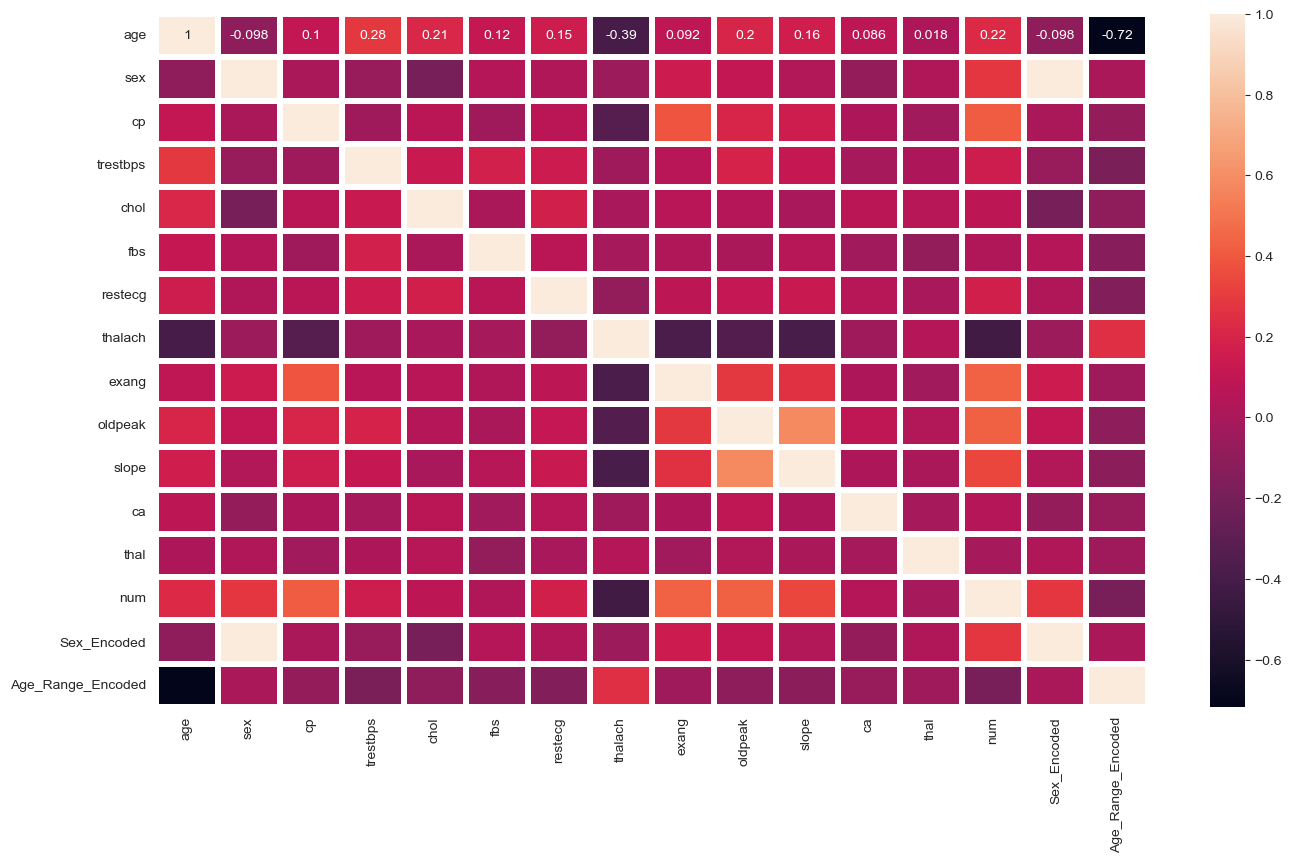

In [109]:
##Heatmap Creation using Seaborn
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
data['Sex_Encoded'] = label_encoder.fit_transform(data['sex1'])
data['Age_Range_Encoded'] = label_encoder.fit_transform(data['Age_Range'])

plt.figure(figsize=(16, 9))
# Drop the original categorical columns
sns.heatmap(data.drop(columns=['Heart_Disease_Encoded', 'sex1', 'Age_Range']).corr(), annot=True, linewidth=3)
plt.show()
